In [1]:
%autosave 0

Autosave disabled


In [2]:
#from customplot import *
#import itertools
#import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [3]:
#Setando configurações de visualização
pd.options.display.max_rows=350
pd.options.display.max_columns=60

In [4]:
df=pd.read_csv('baseProjeto_entradaModelo.csv', index_col=0)

In [5]:
df

,AREA,POÇO,ID_INTERVALO,ATRIB_MED1,ATRIB_MAX1,ATRIB_DIST1,DIFP,MGP1,MGP2,MGP3,MGP4,MGP5,MGP6,MGP7,MGP8,MGP9,MGP10,MGP11,MGP12,MGP13,MGP14,Perda30,PerdaAPI,PerdaPS,PERDA_MAX
1,C1,C1P1,A1,0.08,0.54,1000.00,0.6100,1,1,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,100.00
2,C1,C1P1,A2,0.05,0.05,1000.00,0.5400,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,12.00
3,C1,C1P1,A3,0.05,0.05,1000.00,0.6100,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,10.00
4,C1,C1P1,B1,0.13,0.92,1000.00,0.6300,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0.00
5,C1,C1P2,A1,0.16,0.83,300.00,0.4200,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,999.00
7,C1,C1P2,A3,0.46,0.95,17.00,0.6040,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,500.00
8,C1,C1P2,B1,0.12,0.84,127.00,0.6950,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,450.00
9,C1,C1P3,A1,0.05,0.05,1000.00,0.4700,0,1,1,1,0,0,0,0,1,1,1,1,0,1,1,1,0,120.00
11,C1,C1P3,A3,0.26,0.95,120.00,0.3630,0,1,1,1,0,0,0,0,1,1,1,1,0,1,1,1,0,60.00
12,C1,C1P3,B1,0.05,0.05,1000.00,0.3500,0,1,1,1,0,0,0,0,1,1,1,1,0,1,1,1,1,300.00


In [6]:
df.columns

Index(['AREA', 'POÇO', 'ID_INTERVALO', 'ATRIB_MED1', 'ATRIB_MAX1',
       'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
       'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14',
       'Perda30', 'PerdaAPI', 'PerdaPS', 'PERDA_MAX'],
      dtype='object')

In [7]:
X=df[['ATRIB_MED1', 'ATRIB_MAX1',
       'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
       'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14']]

In [8]:
X;

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 1 to 303
Data columns (total 18 columns):
ATRIB_MED1     293 non-null float64
ATRIB_MAX1     293 non-null float64
ATRIB_DIST1    293 non-null float64
DIFP           293 non-null float64
MGP1           293 non-null int64
MGP2           293 non-null int64
MGP3           293 non-null int64
MGP4           293 non-null int64
MGP5           293 non-null int64
MGP6           293 non-null int64
MGP7           293 non-null int64
MGP8           293 non-null int64
MGP9           293 non-null int64
MGP10          293 non-null int64
MGP11          293 non-null int64
MGP12          293 non-null int64
MGP13          293 non-null int64
MGP14          293 non-null int64
dtypes: float64(4), int64(14)
memory usage: 43.5 KB


In [10]:
'''
#cat=['MGP1_sim', 'MGP2_sim', 'MGP3_sim', 'MGP4_sim',
       'MGP5_sim', 'MGP6_sim', 'MGP7_sim', 'MGP8_sim', 'MGP9_sim', 'MGP10_sim',
       'MGP11_sim', 'MGP12_sim', 'MGP13_sim', 'MGP14_sim',]
#X[cat] = X[cat].astype('category')
'''

"\n#cat=['MGP1_sim', 'MGP2_sim', 'MGP3_sim', 'MGP4_sim',\n       'MGP5_sim', 'MGP6_sim', 'MGP7_sim', 'MGP8_sim', 'MGP9_sim', 'MGP10_sim',\n       'MGP11_sim', 'MGP12_sim', 'MGP13_sim', 'MGP14_sim',]\n#X[cat] = X[cat].astype('category')\n"

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 1 to 303
Data columns (total 18 columns):
ATRIB_MED1     293 non-null float64
ATRIB_MAX1     293 non-null float64
ATRIB_DIST1    293 non-null float64
DIFP           293 non-null float64
MGP1           293 non-null int64
MGP2           293 non-null int64
MGP3           293 non-null int64
MGP4           293 non-null int64
MGP5           293 non-null int64
MGP6           293 non-null int64
MGP7           293 non-null int64
MGP8           293 non-null int64
MGP9           293 non-null int64
MGP10          293 non-null int64
MGP11          293 non-null int64
MGP12          293 non-null int64
MGP13          293 non-null int64
MGP14          293 non-null int64
dtypes: float64(4), int64(14)
memory usage: 43.5 KB


In [12]:
y = df['Perda30']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=21)

<br>
## Clustering

In [29]:
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler, kmeans)

# Fit model to points
pipeline.fit(X)

# Determine the cluster labels of new_points: labels
y_cluster = pipeline.predict(X)

# Print cluster labels of new_points
#print(y_cluster)

In [31]:
# Create a DataFrame with labels and varieties as columns: df
dfcluster = pd.DataFrame({'labels': y_cluster, 'Perda': y})

# Create crosstab: ct
ct = pd.crosstab(dfcluster['labels'],dfcluster['Perda'])

# Display ct
print(ct)

Perda     0   1
labels         
0        72  22
1       110   6
2        45  38


In [32]:
kmeans = KMeans(n_clusters=3)

# Fit model to points
kmeans.fit(X)

# Determine the cluster labels of new_points: labels
y_cluster = kmeans.predict(X)

# Print cluster labels of new_points
#print(y_cluster)

In [33]:
# Create a DataFrame with labels and varieties as columns: df
dfcluster = pd.DataFrame({'labels': y_cluster, 'Perda': y})

# Create crosstab: ct
ct = pd.crosstab(dfcluster['labels'],dfcluster['Perda'])

# Display ct
print(ct)

Perda    0   1
labels        
0       70  39
1       95  10
2       62  17


Investigate the best number of clusters

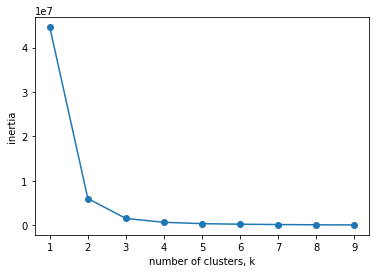

In [18]:
ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    kmeans = KMeans(n_clusters=k)
        
    # Fit model to samples
    kmeans.fit(X)
    
    # Append the inertia to the list of inertias
    inertias.append(kmeans.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()
